# Implementation of knn

### Problem Statement: Predicting cancer cases and no-cancer cases

### Data Description
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei

## Attribute Information:
<br> Real-valued features are computed for three cell nucleus that are mean, se, worst
<br>a) radius (mean of distances from center to points on the perimeter) 
<br>b) texture (standard deviation of gray-scale values) 
<br>c) perimeter 
<br>d) area 
<br>e) smoothness (local variation in radius lengths) 
<br>f) compactness (perimeter^2 / area - 1.0) 
<br>g) concavity (severity of concave portions of the contour) 
<br>h) concave points (number of concave portions of the contour) 
<br>i) symmetry 
<br>j) fractal dimension ("coastline approximation" - 1)


### Import important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Data Import

In [2]:
# reading data set
df_cancerdata = pd.read_csv('C:\\Algoritmo\\cancerdata.csv')
df_cancerdata.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,...,25.38,17.33,184.60,2019.0,0.1622,0.134597,0.7119,0.120681,0.4601,0.101594
1,842517,M,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,...,24.99,23.41,158.80,1956.0,0.1238,0.529227,0.2416,0.035439,0.2750,0.079397
2,84300903,M,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,...,23.57,25.53,152.50,1709.0,0.1444,0.166906,0.4504,0.149670,0.3613,0.088802
3,84348301,M,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,...,14.91,26.50,98.87,567.7,0.2098,0.224998,0.6869,0.110799,0.6638,0.086210
4,84358402,M,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,...,22.54,16.67,152.20,1575.0,0.1374,0.075833,0.4000,0.126386,0.2364,0.087483


### We remove the columns that we do not need 

In [3]:
# removing id and Unnamed columns
df_cancerdata = df_cancerdata.drop(['id'], axis = 1) # where 1 is the axis number (0 for rows and 1 for columns.)

In [4]:
df_cancerdata.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,0.150053,...,25.38,17.33,184.60,2019.0,0.1622,0.134597,0.7119,0.120681,0.4601,0.101594
1,M,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,0.213798,...,24.99,23.41,158.80,1956.0,0.1238,0.529227,0.2416,0.035439,0.2750,0.079397
2,M,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,0.222581,...,23.57,25.53,152.50,1709.0,0.1444,0.166906,0.4504,0.149670,0.3613,0.088802
3,M,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,0.179685,...,14.91,26.50,98.87,567.7,0.2098,0.224998,0.6869,0.110799,0.6638,0.086210
4,M,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,0.147534,...,22.54,16.67,152.20,1575.0,0.1374,0.075833,0.4000,0.126386,0.2364,0.087483


### Dimensions of dataset

In [5]:
# To get dimensions of dataset
df_cancerdata.shape

(569, 31)

### Checking datatypes

In [6]:
# check datatypes
df_cancerdata.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_wors           float64
concavity_worst            float64
concave points_worst

dtypes handles data type of variables. here we can see that all the values are numeric in our dataset

### Checking missing values

In [7]:
# Check for null values
df_cancerdata.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_wors           0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In the above result we can see that null values are not present in the dataset

## Summary Statistics
Here we take a look at the summary of each attribute

In [8]:
# To get summary statistics of data
df_cancerdata.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.157073,19.025699,91.969033,654.889104,0.095887,0.106397,0.092388,0.048655,0.179979,0.063291,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.243948,0.272188,0.122288,0.290076,0.082584
std,3.435295,4.515361,24.298981,351.914129,0.013778,0.051773,0.082573,0.042227,0.026742,0.006770,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.156127,0.208624,0.064848,0.061867,0.018546
min,2.174108,5.225685,43.790000,143.500000,0.045915,-0.055431,-0.156186,-0.078615,0.103582,0.041265,...,7.930000,12.020000,50.410000,185.200000,0.071170,-0.198310,0.000000,-0.133583,0.156500,0.031090
25%,11.762811,15.926529,75.170000,420.300000,0.085801,0.070217,0.037784,0.020214,0.162974,0.058996,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.130946,0.114500,0.077446,0.250400,0.068561
50%,14.142920,19.135095,86.240000,551.100000,0.096244,0.105569,0.093832,0.048666,0.179796,0.062821,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.237884,0.226700,0.120702,0.282200,0.082181
75%,16.403557,22.060029,104.100000,782.700000,0.105867,0.143065,0.148154,0.077010,0.198569,0.067782,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.345980,0.382900,0.162843,0.317900,0.094202
max,24.961616,31.692291,188.500000,2501.000000,0.144596,0.248430,0.335120,0.189527,0.261135,0.087951,...,36.040000,49.540000,251.200000,4254.000000,0.222600,0.693251,1.252000,0.313149,0.663800,0.140263


Summary of statistics pertaining to the DataFrame columns. This function gives the mean, std, minimum value, maximum value and IQR values and given summary about numeric columns

### Convert diagnosis value of M and B to a numerical value

In [9]:
# Change M & B 
def diagnosis_value(diagnosis):
    if diagnosis == 'M':
        return 1
    else:
        return 0

df_cancerdata['diagnosis'] = df_cancerdata['diagnosis'].apply(diagnosis_value)

### Splitting the data: training and test

In [10]:
# Train-Test-Split 
from sklearn.model_selection import train_test_split
X = df_cancerdata.drop(['diagnosis'], axis=1)
Y = df_cancerdata ['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)

### KNN implementation
Now we are fitting KNN algorithm on training data, predicting labels for dataset and printing the accuracy of the model for different values of K

In [11]:
# Create-KNN-model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
for K in range(25):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(x_train, y_train) 
    y_pred = neigh.predict(x_test)
    print ("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)

Accuracy is  93.08510638297872 % for K-Value: 1
Accuracy is  94.14893617021278 % for K-Value: 2
Accuracy is  93.08510638297872 % for K-Value: 3
Accuracy is  93.61702127659575 % for K-Value: 4
Accuracy is  94.68085106382979 % for K-Value: 5
Accuracy is  95.74468085106383 % for K-Value: 6
Accuracy is  96.80851063829788 % for K-Value: 7
Accuracy is  96.80851063829788 % for K-Value: 8
Accuracy is  96.80851063829788 % for K-Value: 9
Accuracy is  96.27659574468085 % for K-Value: 10
Accuracy is  97.87234042553192 % for K-Value: 11
Accuracy is  97.3404255319149 % for K-Value: 12
Accuracy is  96.80851063829788 % for K-Value: 13
Accuracy is  96.80851063829788 % for K-Value: 14
Accuracy is  96.80851063829788 % for K-Value: 15
Accuracy is  96.80851063829788 % for K-Value: 16
Accuracy is  96.80851063829788 % for K-Value: 17
Accuracy is  96.80851063829788 % for K-Value: 18
Accuracy is  96.80851063829788 % for K-Value: 19
Accuracy is  95.74468085106383 % for K-Value: 20
Accuracy is  96.27659574468085

It shows that we are getting highest accuracy 97.87 on k=11 

### Optimizing the number of neighbor using cross validation

In [12]:
# Performing cross validation
neighbors = []
cv_scores = []
from sklearn.model_selection import cross_val_score
#perform 10 fold cross validation
for k in range(1,51,2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,x_train,y_train,cv=10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

### Misclassification Error

In [13]:
# Misclassification error versus k
MSE = [1-x for x in cv_scores]

#determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is %d ' %optimal_k)


The optimal number of neighbors is 13 


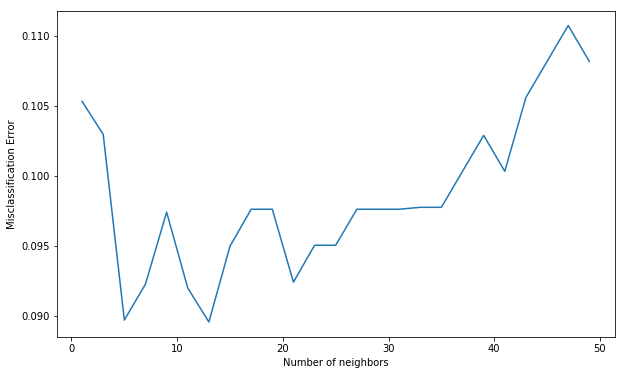

In [14]:
# plot misclassification error versus k
plt.figure(figsize = (10,6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()

From the above plot the optimal k value is somewhere between 11 and 13. Looking at the scores, at k=13 we have the lowest misclassification error